In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
phones = pd.read_csv('phones_data.csv')
phones.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [3]:
#checking for duplicates
phones['Unnamed: 0'].duplicated().sum()

0

In [4]:
#renaming column 

phones.rename(columns = {'Unnamed: 0':'Code'}, inplace=True)

In [5]:
phones

,Code,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018
1220,1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018
1221,1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019
1222,1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,752,18755.0,18500.0,19010.0,2,6.65,128.0,4500.0,10-2020


In [6]:
#setting code column as index

phones.set_index('Code', drop=True, inplace=True)

In [7]:
#Checking data types

phones.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [8]:
#coverting date column to date type

phones['release_date']= phones['release_date'].astype('datetime64')

*=> Seems the correct data types*

In [9]:
#Checking for null values

phones.isnull().sum()

brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [10]:
#droping null os values

phones.dropna(subset=['os'], axis=0, inplace=True)

In [11]:
#dropping null battery_size values

phones.dropna(subset=['battery_size'] , axis=0, inplace=True)

In [12]:
#dropping null screen_size values

phones.dropna(subset=['screen_size'] , axis=0, inplace=True)

In [13]:
#Replacing null highest price with the mean

phones['highest_price'].fillna(phones['highest_price'].mean(), inplace=True)

In [14]:
#Replacing null lowest price with the mean

phones['lowest_price'].fillna(phones['lowest_price'].mean(), inplace=True)

In [15]:
#checking for data types again

phones.dtypes

brand_name                object
model_name                object
os                        object
popularity                 int64
best_price               float64
lowest_price             float64
highest_price            float64
sellers_amount             int64
screen_size              float64
memory_size              float64
battery_size             float64
release_date      datetime64[ns]
dtype: object

In [16]:
#Evaluating data statistics

phones.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,650.452756,9256.238189,9214.326923,11751.229487,15.807087,5.990354,103.133858,3988.392717
std,356.367500,8985.226923,7580.032597,10244.129821,21.154747,0.623278,112.516498,1329.094396
min,2.000000,840.000000,899.000000,1059.000000,1.000000,2.400000,4.000000,1300.000000
25%,343.750000,3498.750000,4051.500000,4723.500000,2.000000,5.500000,32.000000,3020.000000
50%,673.500000,5497.000000,7999.000000,9624.000000,7.000000,6.100000,64.000000,4000.000000
75%,964.250000,11787.750000,9214.326923,11751.229487,22.000000,6.500000,128.000000,4500.000000
max,1224.000000,55338.000000,45799.000000,64999.000000,125.000000,8.100000,1000.000000,13000.000000


Text(0.5, 1.0, 'Phones Data Outliers')

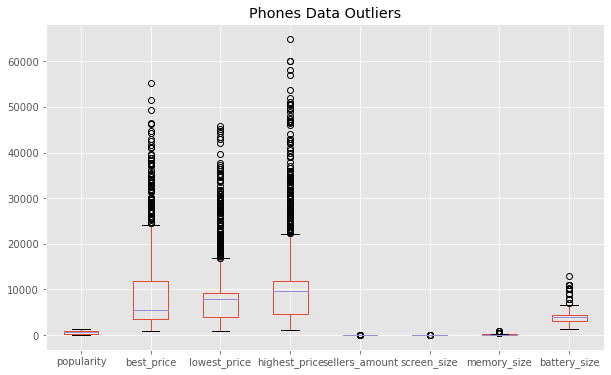

In [17]:
#Checking for outliers
plt.style.use('ggplot')
phones.boxplot(figsize=(10,6))
plt.title('Phones Data Outliers')

*=> It seems that the outliers are mainly concentrated into best_price, lowest_price, and highest_price categories*

In [18]:
#Evaluating Quartiles

phones.quantile([0,0.25,0.5,0.75,1])

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0.00,2.00,840.00,899.000000,1059.000000,1.0,2.4,4.0,1300.0
0.25,343.75,3498.75,4051.500000,4723.500000,2.0,5.5,32.0,3020.0
0.50,673.50,5497.00,7999.000000,9624.000000,7.0,6.1,64.0,4000.0
0.75,964.25,11787.75,9214.326923,11751.229487,22.0,6.5,128.0,4500.0
1.00,1224.00,55338.00,45799.000000,64999.000000,125.0,8.1,1000.0,13000.0


## Evaluating Interquartile Range

In [19]:
#best price

best_price_IQR=phones['best_price'].quantile(0.75)-phones['best_price'].quantile(0.25)

#lowest price

lowest_price_IQR=phones['lowest_price'].quantile(0.75)-phones['lowest_price'].quantile(0.25)

#highest price

highest_price_IQR=phones['highest_price'].quantile(0.75)-phones['highest_price'].quantile(0.25)

## Evaluating Upper Outliers

In [20]:
#best price

best_price_upper = phones['best_price'].quantile(0.75)+1.5*best_price_IQR

#lowest price

lowest_price_upper = phones['lowest_price'].quantile(0.75)+1.5*lowest_price_IQR

#highest price

highest_price_upper = phones['highest_price'].quantile(0.75)+1.5*highest_price_IQR

## Evaluating Lower Outliers

In [21]:
#best price

best_price_lower = phones['best_price'].quantile(0.25)-1.5*best_price_IQR

#lowest price

lowest_price_lower = phones['lowest_price'].quantile(0.25)-1.5*lowest_price_IQR

#highest price

highest_price_lower = phones['highest_price'].quantile(0.25)-1.5*highest_price_IQR

## Generating and Evaluating Outliers

In [22]:
#best price

phones[(phones['best_price']>best_price_upper)|(phones['best_price']<best_price_lower)]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
Code,,,,,,,,,,,,
356,OPPO,Find X2 12/256GB Ocean Black,Android,590,29999.0,9214.326923,11751.229487,2,6.7,256.0,4200.0,2020-04-01
357,OPPO,Find X2 Pro 12/512GB Orange,Android,474,32530.0,31720.000000,33999.000000,4,6.7,512.0,4260.0,2021-01-01
432,Samsung,Galaxy Fold 12/256GB Black,Android,298,55338.0,45799.000000,59999.000000,4,7.3,256.0,4380.0,2019-11-01
433,Samsung,Galaxy Fold 12/512GB Black (SM-F900FZKD),Android,819,41310.0,34100.000000,56999.000000,31,7.3,512.0,4380.0,2019-03-01
434,Samsung,Galaxy Fold 5G SM-F907B 12/512GB Black,Android,304,37640.0,35400.000000,49593.000000,10,7.3,512.0,4235.0,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1157,Apple,iPhone 12 Pro Max 512GB Pacific Blue (MGDL3),iOS,1103,46325.0,43396.000000,57999.000000,92,6.7,512.0,3687.0,2020-10-01
1158,Apple,iPhone 12 mini 128GB Black (MGE33),iOS,1183,25687.0,23293.000000,31499.000000,111,5.4,128.0,2227.0,2020-10-01
1159,Apple,iPhone 12 mini 256GB Black (MGE93),iOS,995,31369.0,28599.000000,35499.000000,81,5.4,256.0,2227.0,2020-10-01


In [23]:
#lowest price

phones[(phones['lowest_price']>lowest_price_upper)|(phones['lowest_price']<lowest_price_lower)]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
Code,,,,,,,,,,,,
112,OnePlus,8 Pro 12/256GB Glacial Green,Android,1095,22587.0,21778.0,25999.0,32,6.78,256.0,4510.0,2020-04-01
113,OnePlus,8 Pro 8/128GB Onyx Black,Android,1161,20709.0,20095.0,21999.0,23,6.78,128.0,4510.0,2020-04-01
114,Nokia,8.3 5G 8/128GB Polar Night,Android,1055,19041.0,18500.0,20517.0,18,6.81,128.0,4500.0,2020-10-01
122,OnePlus,8T 12/256GB Cyberpunk 2077 Limited Edition,Android,938,23999.0,23999.0,24000.0,2,6.55,256.0,4500.0,2021-01-01
123,OnePlus,8T 12/256GB Lunar Silver,Android,1159,18200.0,17249.0,19999.0,29,6.55,256.0,4500.0,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1215,Apple,iPhone XS 512GB Silver (MT9M2),iOS,803,22842.0,17832.0,27500.0,62,5.80,512.0,2568.0,2018-09-01
1217,Apple,iPhone XS Max 256GB Gold (MT552),iOS,1128,24184.0,18399.0,30600.0,37,6.50,256.0,3174.0,2018-09-01
1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,2018-09-01


In [24]:
#best price

phones[(phones['highest_price']>highest_price_upper)|(phones['highest_price']<highest_price_lower)]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
Code,,,,,,,,,,,,
112,OnePlus,8 Pro 12/256GB Glacial Green,Android,1095,22587.0,21778.0,25999.0,32,6.78,256.0,4510.0,2020-04-01
122,OnePlus,8T 12/256GB Cyberpunk 2077 Limited Edition,Android,938,23999.0,23999.0,24000.0,2,6.55,256.0,4500.0,2021-01-01
357,OPPO,Find X2 Pro 12/512GB Orange,Android,474,32530.0,31720.0,33999.0,4,6.70,512.0,4260.0,2021-01-01
432,Samsung,Galaxy Fold 12/256GB Black,Android,298,55338.0,45799.0,59999.0,4,7.30,256.0,4380.0,2019-11-01
433,Samsung,Galaxy Fold 12/512GB Black (SM-F900FZKD),Android,819,41310.0,34100.0,56999.0,31,7.30,512.0,4380.0,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Apple,iPhone XS 64GB Space Gray (MT9E2),iOS,1187,19790.0,12505.0,23928.0,53,5.80,64.0,2568.0,2018-09-01
1217,Apple,iPhone XS Max 256GB Gold (MT552),iOS,1128,24184.0,18399.0,30600.0,37,6.50,256.0,3174.0,2018-09-01
1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,2018-09-01


**It seems that outliers represents a large portion of the data, and at the same time doesn't seem to be due to data collection errors. 
Hence, we won't be removing them.**

In [25]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   brand_name      1016 non-null   object        
 1   model_name      1016 non-null   object        
 2   os              1016 non-null   object        
 3   popularity      1016 non-null   int64         
 4   best_price      1016 non-null   float64       
 5   lowest_price    1016 non-null   float64       
 6   highest_price   1016 non-null   float64       
 7   sellers_amount  1016 non-null   int64         
 8   screen_size     1016 non-null   float64       
 9   memory_size     1016 non-null   float64       
 10  battery_size    1016 non-null   float64       
 11  release_date    1016 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 103.2+ KB


*=> The data seems to be just fine and ready for analysis*

## First : Analysis according to: 'Best Price'

Text(0.5, 1.0, 'Brand Name Best Price')

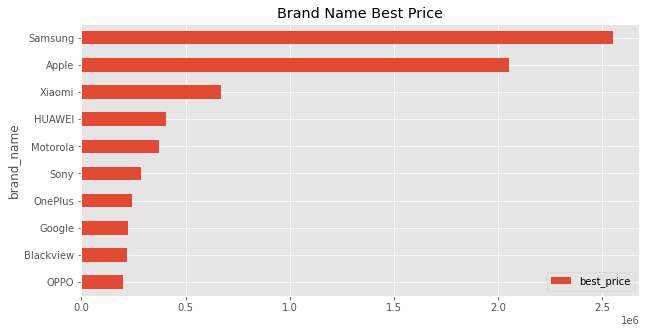

In [26]:
#brand name best price

phones[['brand_name','best_price']].groupby('brand_name').sum().sort_values('best_price').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('Brand Name Best Price')

**Top 5 Brands according to best price:**
    
    1-Samsung
    2-Apple
    3-Xiaomi
    4-HUAWEI
    5-Motorola

Text(0.5, 1.0, 'OS Best Price')

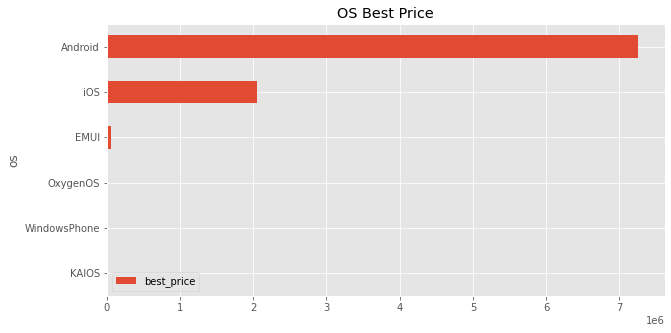

In [27]:
#os best price

phones[['os','best_price']].groupby('os').sum().sort_values('best_price').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('OS Best Price')

*=> Android, by far, is the best os price followed by iOS*

## Secondly : Analysis according to: 'Sellers Amount'


Text(0.5, 0, 'sellers amount')

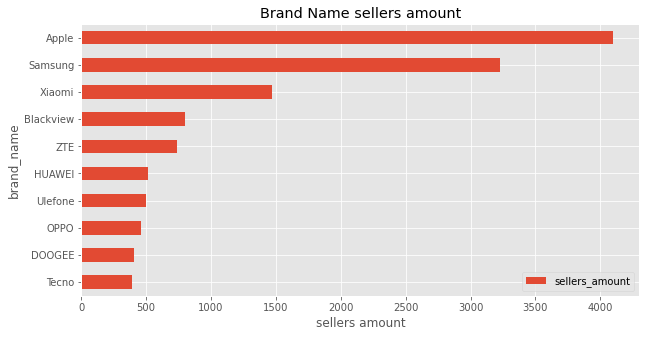

In [28]:
#sellers amount by brand name

phones[['brand_name','sellers_amount']].groupby('brand_name').sum().sort_values('sellers_amount').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('Brand Name sellers amount')
plt.xlabel('sellers amount')

**Top 5 Brands according to sellers amount:**

      1-Apple
      2-Samsung
      3-Xiaomi
      4-Blackview
      5-ZTE

Text(0.5, 0, 'sellers amount')

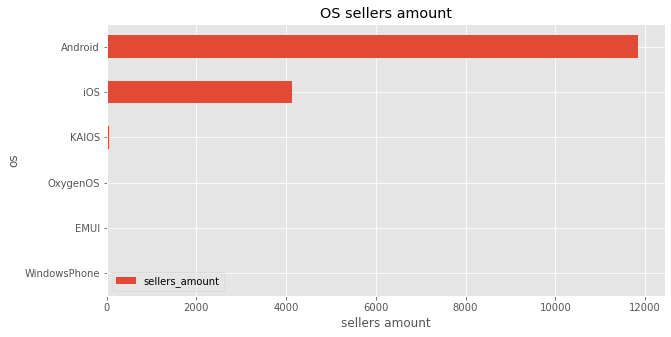

In [29]:
#sellers amount by os

phones[['os','sellers_amount']].groupby('os').sum().sort_values('sellers_amount').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('OS sellers amount')
plt.xlabel('sellers amount')

*=> Android is the best os selling followed by iOS*

## Thirdly : Analysis according to: 'Popularity'

Text(0.5, 0, 'Popularity')

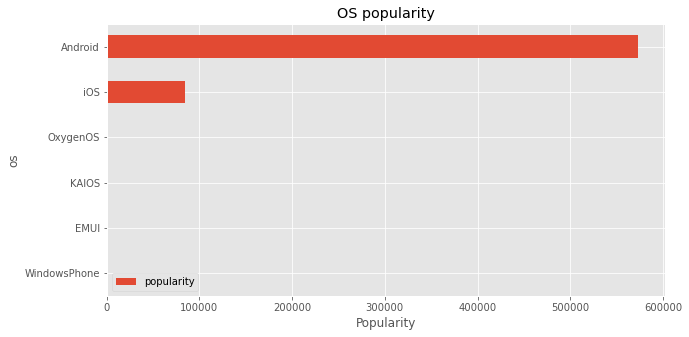

In [30]:
#OS Popularity

phones[['os','popularity']].groupby('os').sum().sort_values('popularity').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('OS popularity')
plt.xlabel('Popularity')

*=> Android is the most popular OS followed by iOS*

Text(0.5, 0, 'Popularity')

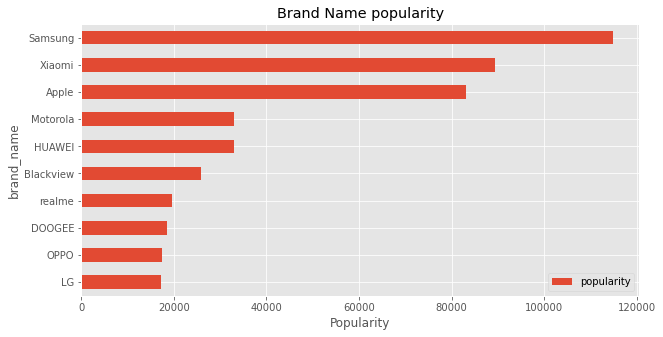

In [31]:
#Brand Name Popularity

phones[['brand_name','popularity']].groupby('brand_name').sum().sort_values('popularity').tail(10).plot(kind='barh',figsize=(10,5))
plt.title('Brand Name popularity')
plt.xlabel('Popularity')

**Top 5 popular brands are:**
    
    1-Samsung
    2-Xiaomi
    3-Apple
    4-Motorola
    5-HUAWEI

Text(0.5, 1.0, 'Lowest Price Over the Years')

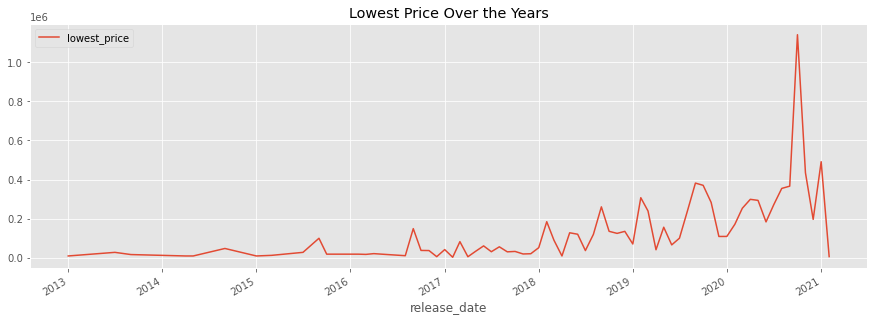

In [32]:
#Evaluating Lowest Price Over the years

phones[['release_date','lowest_price']].groupby('release_date').sum().plot(kind='line',figsize=(15,5))
plt.title('Lowest Price Over the Years')


*=> The most lowest price was in the period in between 2020 and 2021*

Text(0.5, 1.0, 'Highest Price Over the Years')

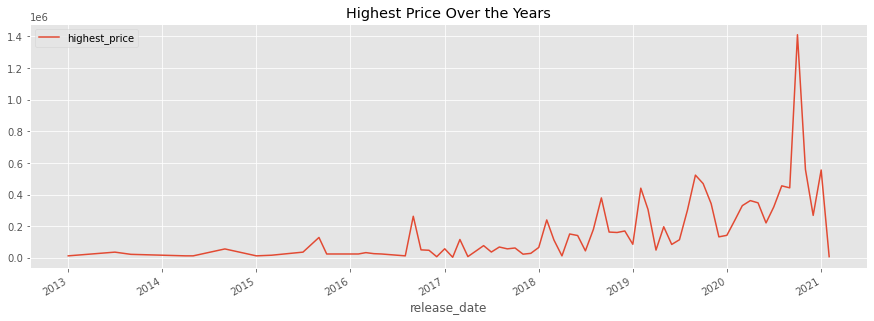

In [33]:
#Evaluating Highest Price Over the years

phones[['release_date','highest_price']].groupby('release_date').sum().plot(kind='line',figsize=(15,5))
plt.title('Highest Price Over the Years')


*=> Also, the most highest price was in the period in between 2020 and 2021*

# Lastly, let's establish correlations

In [34]:
#Evaluating pearson coef and p-value

pearson_coef, p_value=stats.pearsonr(phones['sellers_amount'],phones['popularity'])
pearson_coef, p_value

(0.5451624944686501, 1.0099725405833052e-79)

*There is a moderate positive correlation between sellers amount and popularity. However, this correlation is not statistically significant and could be due to chance*

Text(0.5, 1.0, 'Popularity VS Sellers_Amount')

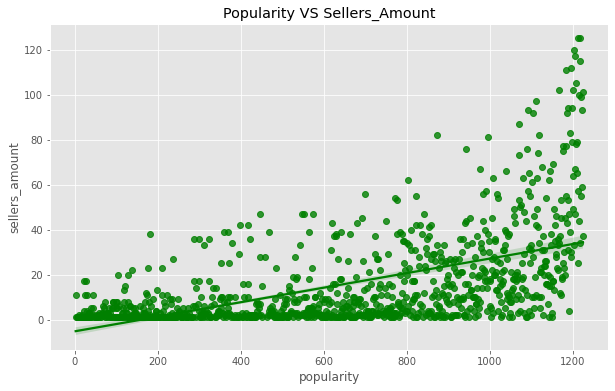

In [35]:
#visualizing popularity and sellers amount

plt.figure(figsize=(10,6))
sns.regplot(x='popularity',y='sellers_amount', data=phones, color='green')
plt.title('Popularity VS Sellers_Amount')

In [36]:
#evaluating pearson coefficient and p-value

pearson_coef, p_value =stats.pearsonr(phones['screen_size'],phones['best_price'])
pearson_coef, p_value

(0.3731102518501163, 6.560507021777776e-35)

*There's a weak positive correlation between screen size and best price. However, the results also show that this could be due to chance*

Text(0.5, 1.0, 'Screen Size Vs Best Price')

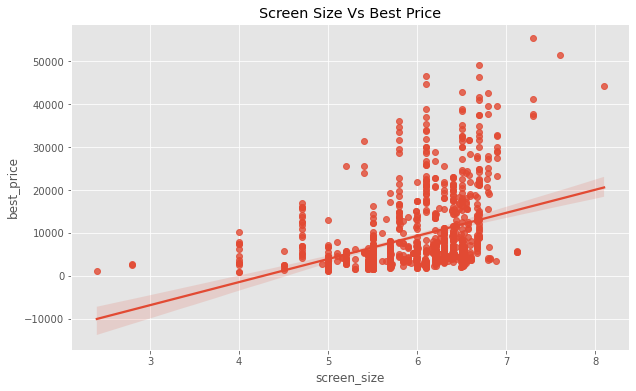

In [37]:
#visualizing screen size and best price correlation

plt.figure(figsize=(10,6))
sns.regplot(x='screen_size',y='best_price',data=phones)
plt.title('Screen Size Vs Best Price')

In [38]:
#evaluating pearson coefficient and p-value

pearson_coef, p_value=stats.pearsonr(phones['popularity'],phones['best_price'])
pearson_coef, p_value

(0.29676055999756407, 4.2008408788918076e-22)

Text(0.5, 1.0, 'Popularity Vs Best Price')

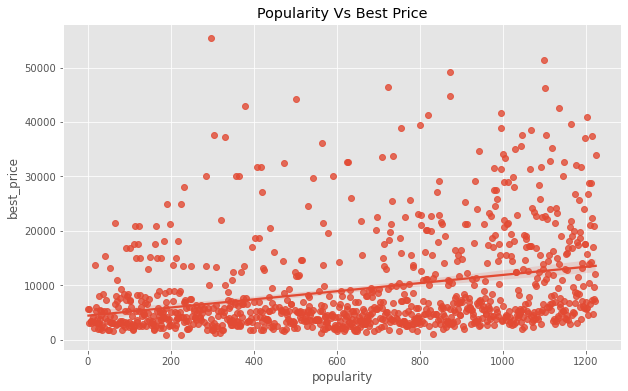

In [39]:
#visualization

plt.figure(figsize=(10,6))
sns.regplot(x='popularity',y='best_price',data=phones)
plt.title('Popularity Vs Best Price')

**so we could say that popularity is a very weak indicator for price.**

*i.e. Weak correlation exists, which is statistically significant and not due to chance*

In [40]:
#evaluating pearson coefficient and p-value

pearson_coef, p_value=stats.pearsonr(phones['battery_size'],phones['best_price'])
pearson_coef, p_value

(-0.016139763374280882, 0.6073560455694378)

*So, it's clear that there is a weak correlation btween battery size and price. This correlation is statistically significant and not due to chance*

# Data Findings

=> Top 5 Brands according to best price:

    1-Samsung
    2-Apple
    3-Xiaomi
    4-HUAWEI
    5-Motorola

=> Android is the best os price followed by iOS

=> Top 5 Brands according to sellers amount:

      1-Apple
      2-Samsung
      3-Xiaomi
      4-Blackview
      5-ZTE
    
=> Android is the best os selling followed by iOS

=> Android is the most popular OS followed by iOS

=> Top 5 popular brands are:
    
    1-Samsung
    2-Xiaomi
    3-Apple
    4-Motorola
    5-HUAWEI
    
=> The most lowest price was in the period in between 2020 and 2021

=> Also, the most highest price was in the period in between 2020 and 2021

=> There is a moderate positive correlation between sellers amount and popularity. However, this correlation is not statistically    significant and could be due to chance

=> There's a weak positive correlation between screen size and best price. However, the results also show that this could be   
   due to chance
   
=> so we could say that popularity is a very weak indicator for price.

   i.e. Weak correlation exists, which is statistically significant and not due to chance

=> There is a weak correlation btween battery size and price. This correlation is statistically significant and not due  
    to chance


In [41]:
phones.to_csv('phones_project.csv')